# Titanic - ML

In [1]:
#pd.set_option('display.max_rows', None)

In [2]:
import seaborn as sns

In [3]:
import pandas as pd

titanic_df = pd.read_excel("titanic3.xls")

titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
columns = ['pclass', 'survived', 'sex', 'age']
titanic_df = titanic_df[columns]
titanic_df

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
...,...,...,...,...
1304,3,0,female,14.5000
1305,3,0,female,NaN
1306,3,0,male,26.5000
1307,3,0,male,27.0000


In [5]:
titanic_df.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


## Remplacer les variables catégorielles en dummies

In [6]:
titanic_df = pd.get_dummies(titanic_df, drop_first=True)
titanic_df

,pclass,survived,age,sex_male
0,1,1,29.0000,0
1,1,1,0.9167,1
2,1,0,2.0000,0
3,1,0,30.0000,1
4,1,0,25.0000,0
...,...,...,...,...
1304,3,0,14.5000,0
1305,3,0,NaN,0
1306,3,0,26.5000,1
1307,3,0,27.0000,1


## Iterative Imputer => Permet de remplacer des valeurs manquantes

In [7]:
X = titanic_df.drop(columns='survived')
y = titanic_df['survived']

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor

imp = IterativeImputer(KNeighborsRegressor(n_neighbors=5))

In [9]:
imp.fit(X)

IterativeImputer(estimator=KNeighborsRegressor())

In [10]:
X_trans = imp.transform(X)
X_trans

array([[ 1.    , 29.    ,  0.    ],
       [ 1.    ,  0.9167,  1.    ],
       [ 1.    ,  2.    ,  0.    ],
       ...,
       [ 3.    , 26.5   ,  1.    ],
       [ 3.    , 27.    ,  1.    ],
       [ 3.    , 29.    ,  1.    ]])

In [11]:
X_trans = pd.DataFrame(data=X_trans, columns=X.columns)
X_trans

,pclass,age,sex_male
0,1.0,29.0000,0.0
1,1.0,0.9167,1.0
2,1.0,2.0000,0.0
3,1.0,30.0000,1.0
4,1.0,25.0000,0.0
...,...,...,...
1304,3.0,14.5000,0.0
1305,3.0,27.2000,0.0
1306,3.0,26.5000,1.0
1307,3.0,27.0000,1.0


In [12]:
X_trans.isnull().sum()

pclass      0
age         0
sex_male    0
dtype: int64

/Users/blanchardnicolas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

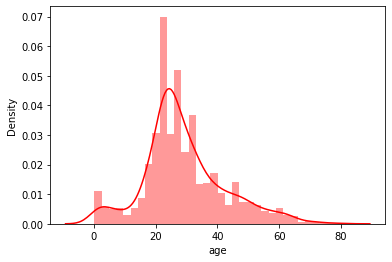

In [13]:
sns.distplot(X_trans.age, color='red', label='age')

### Train test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
        X_trans, y, test_size=0.25, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(981, 3) (328, 3) (981,) (328,)


In [16]:
y_test

201     0
115     0
255     1
1103    0
195     1
       ..
34      0
85      1
984     1
156     0
670     0
Name: survived, Length: 328, dtype: int64

### KNN avec GridSearch

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [18]:
params = {'n_neighbors' : range(1, 31),
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski', 'manhattan']}

nb_fold = KFold(4, shuffle=True, random_state=1)

grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=nb_fold)

grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']})

In [19]:
grid_KNN.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

In [20]:
grid_KNN.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [21]:
grid_KNN.best_score_

0.7727144516343123

In [22]:
model_KNN = grid_KNN.best_estimator_

print(str(round(model_KNN.score(X_test, y_test), 4) * 100) + '%')

75.91%


In [23]:
model_KNN.score(X_test, y_test)

0.7591463414634146

In [24]:
"{:.2f}%".format(model_KNN.score(X_test, y_test) * 100)

'75.91%'

### Features selection : Chi2

In [25]:
titanic_bis = pd.read_excel("titanic3.xls")

In [26]:
X_bis = titanic_bis.drop(columns=['survived', 'name', 'ticket', 'cabin', 'boat', 'home.dest', 'body'])
y_bis = titanic_bis['survived']

#### Traiter les variables catégorielles

In [27]:
X_bis = pd.get_dummies(data=X_bis, drop_first=True)
X_bis

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,0,0,1
1,1,0.9167,1,2,151.5500,1,0,1
2,1,2.0000,1,2,151.5500,0,0,1
3,1,30.0000,1,2,151.5500,1,0,1
4,1,25.0000,1,2,151.5500,0,0,1
...,...,...,...,...,...,...,...,...
1304,3,14.5000,1,0,14.4542,0,0,0
1305,3,NaN,1,0,14.4542,0,0,0
1306,3,26.5000,0,0,7.2250,1,0,0
1307,3,27.0000,0,0,7.2250,1,0,0


In [28]:
X_bis.isnull().sum()

pclass          0
age           263
sibsp           0
parch           0
fare            1
sex_male        0
embarked_Q      0
embarked_S      0
dtype: int64

<AxesSubplot:>

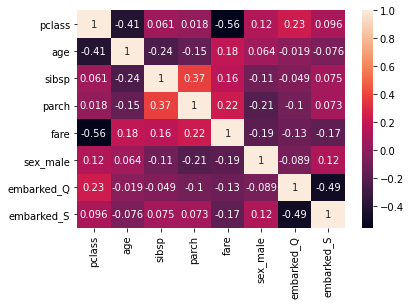

In [29]:
sns.heatmap(X_bis.corr(), annot=True)

In [30]:
columns = X_bis.columns
imp = IterativeImputer(KNeighborsRegressor(n_neighbors=5))
imp.fit(X_bis)
X_bis = imp.transform(X_bis)
X_bis = pd.DataFrame(X_bis, columns=columns)
X_bis

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,29.0000,0.0,0.0,211.3375,0.0,0.0,1.0
1,1.0,0.9167,1.0,2.0,151.5500,1.0,0.0,1.0
2,1.0,2.0000,1.0,2.0,151.5500,0.0,0.0,1.0
3,1.0,30.0000,1.0,2.0,151.5500,1.0,0.0,1.0
4,1.0,25.0000,1.0,2.0,151.5500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1304,3.0,14.5000,1.0,0.0,14.4542,0.0,0.0,0.0
1305,3.0,20.1000,1.0,0.0,14.4542,0.0,0.0,0.0
1306,3.0,26.5000,0.0,0.0,7.2250,1.0,0.0,0.0
1307,3.0,27.0000,0.0,0.0,7.2250,1.0,0.0,0.0


In [31]:
X_bis.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [32]:
from sklearn.feature_selection import chi2

chi2(X_bis, y_bis)

(array([3.90643317e+01, 3.48798719e+01, 2.20271805e+00, 1.73899276e+01,
        6.28259377e+03, 1.30254635e+02, 3.06334549e-01, 9.43584915e+00]),
 array([4.10067763e-10, 3.50687573e-09, 1.37767628e-01, 3.04434998e-05,
        0.00000000e+00, 3.60442736e-30, 5.79938211e-01, 2.12784544e-03]))

In [33]:
chi2, p_value = chi2(X_bis, y_bis)

In [34]:
chi2

array([3.90643317e+01, 3.48798719e+01, 2.20271805e+00, 1.73899276e+01,
       6.28259377e+03, 1.30254635e+02, 3.06334549e-01, 9.43584915e+00])

In [35]:
pd.DataFrame(chi2.reshape(1, -1), columns=X_bis.columns)

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,39.064332,34.879872,2.202718,17.389928,6282.593771,130.254635,0.306335,9.435849


In [36]:
pd.DataFrame(p_value.reshape(1, -1), columns=X_bis.columns)
# H0 : ma feature sélectionnée est indépendante à la target
# H1 : ma feature séectionnée n'est pas indépendante à la target
# si la p_value < 0.05 => Rejet de H0 qui dit que les variables sont indépendantes

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,4.100678e-10,3.506876e-09,0.137768,0.00003,0.0,3.604427e-30,0.579938,0.002128


## Grid search

In [37]:
columns = ['pclass', 'age', 'parch', 'fare', 'sex_male']

In [38]:
X_bis = X_bis[columns]

In [39]:
X_bis_train, X_bis_test, y_bis_train, y_bis_test = train_test_split(
        X_bis, y_bis, test_size=0.25, random_state=1)

print(X_bis_train.shape, X_bis_test.shape, y_bis_train.shape, y_bis_test.shape)

(981, 5) (328, 5) (981,) (328,)


In [40]:
params = {'n_neighbors' : range(1, 31),
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski', 'manhattan']}

nb_fold = KFold(4, shuffle=True, random_state=1)

grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=nb_fold)

grid_KNN.fit(X_bis_train, y_bis_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']})

In [46]:
model_KNN

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [41]:
model_KNN = grid_KNN.best_estimator_
model_KNN.score(X_bis_test, y_bis_test)

0.6585365853658537